**Note: Anything you want to do outside of `PyTorch` convert it to `NumPy` array or `Python` datatype using `tensor.item()`**

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim

In [2]:
# Combined dataset: bikes for short distances, cars for longer ones
distances = torch.tensor([
    [1.0], [1.5], [2.0], [2.5], [3.0], [3.5], [4.0], [4.5], [5.0], [5.5],
    [6.0], [6.5], [7.0], [7.5], [8.0], [8.5], [9.0], [9.5], [10.0], [10.5],
    [11.0], [11.5], [12.0], [12.5], [13.0], [13.5], [14.0], [14.5], [15.0], [15.5],
    [16.0], [16.5], [17.0], [17.5], [18.0], [18.5], [19.0], [19.5], [20.0]
], dtype=torch.float32)

# Corresponding delivery times in minutes
times = torch.tensor([
    [6.96], [9.67], [12.11], [14.56], [16.77], [21.7], [26.52], [32.47], [37.15], [42.35],
    [46.1], [52.98], [57.76], [61.29], [66.15], [67.63], [69.45], [71.57], [72.8], [73.88],
    [76.34], [76.38], [78.34], [80.07], [81.86], [84.45], [83.98], [86.55], [88.33], [86.83],
    [89.24], [88.11], [88.16], [91.77], [92.27], [92.13], [90.73], [90.39], [92.98]
], dtype=torch.float32)

In [3]:
print(distances.shape, times.shape)

torch.Size([39, 1]) torch.Size([39, 1])


In [4]:
import matplotlib.pyplot as plt

def plot_data(distances, times):
    plt.figure(figsize=(6, 8))
    plt.plot(
        distances.numpy(),
        times.numpy(),
        color="blue",
        marker="o",
        linestyle="None",
        label="Actual Delivery Times"
    )
    plt.title("Delivery Data (Bikes & Cars)")
    plt.xlabel("Distance (miles)")
    plt.ylabel("Time (minutes)")
    plt.legend()
    plt.grid(True)
    plt.show()

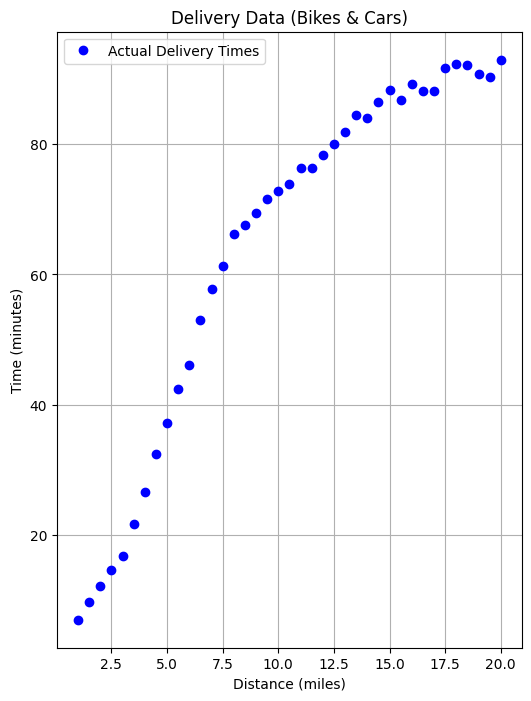

In [5]:
plot_data(distances, times)

**Normalize Data:**

In [6]:
distances_mean = distances.mean()
distances_std = distances.std()

times_mean = times.mean()
times_std = times.std()

# Apply z-socre normalization to the distances
distances_norm = (distances - distances_mean) / distances_std

# Apply z-socre normalization to the distances
times_norm = (times - times_mean) / times_std

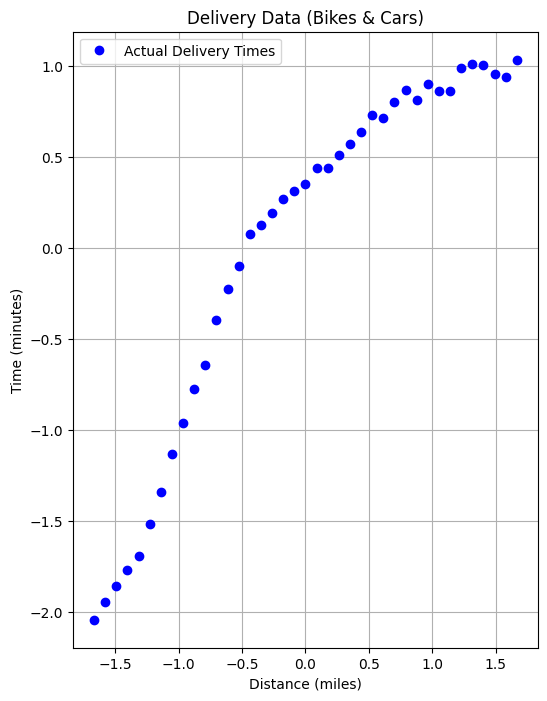

In [7]:
plot_data(distances_norm, times_norm)

**Building model:**

In [8]:
torch.manual_seed(42)

model = nn.Sequential(
    nn.Linear(1, 3),
    nn.ReLU(),
    nn.Linear(3, 1)
)

**Training the model:**

In [9]:
# Define the loss function and optimizer
loss_function = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [10]:
# Store loss
loss_value = []

# Store epoch
epoch_value = []

# Training loop
for epoch in range(3000):
    # Reset the optimizer's gradients
    optimizer.zero_grad()
    # Make predictions (forward pass)
    outputs = model(distances_norm)
    # Calculate the loss
    loss = loss_function(outputs, times_norm)
    # Calculate adjustments (backward pass)
    loss.backward()
    # Update the model's parameters
    optimizer.step()

    # print loss
    if (epoch + 1) % 50 == 0:
        print(f"Epoch: {epoch + 1} | Loss : {loss.item()}")


    epoch_value.append(epoch + 1)
    loss_value.append(loss.item())


print("\nTraining Complete.")
print(f"\nFinal Loss: {loss.item()}")

Epoch: 50 | Loss : 0.4776861369609833
Epoch: 100 | Loss : 0.3627013564109802
Epoch: 150 | Loss : 0.31234583258628845
Epoch: 200 | Loss : 0.2765890061855316
Epoch: 250 | Loss : 0.24904483556747437
Epoch: 300 | Loss : 0.2261781394481659
Epoch: 350 | Loss : 0.20773173868656158
Epoch: 400 | Loss : 0.19173970818519592
Epoch: 450 | Loss : 0.17798247933387756
Epoch: 500 | Loss : 0.16638405621051788
Epoch: 550 | Loss : 0.15592259168624878
Epoch: 600 | Loss : 0.14646103978157043
Epoch: 650 | Loss : 0.137796550989151
Epoch: 700 | Loss : 0.13002756237983704
Epoch: 750 | Loss : 0.12306071817874908
Epoch: 800 | Loss : 0.11662056297063828
Epoch: 850 | Loss : 0.11053546518087387
Epoch: 900 | Loss : 0.10468858480453491
Epoch: 950 | Loss : 0.09902644157409668
Epoch: 1000 | Loss : 0.09351585805416107
Epoch: 1050 | Loss : 0.08813577890396118
Epoch: 1100 | Loss : 0.082891546189785
Epoch: 1150 | Loss : 0.07778428494930267
Epoch: 1200 | Loss : 0.07280657440423965
Epoch: 1250 | Loss : 0.06796688586473465
Epo

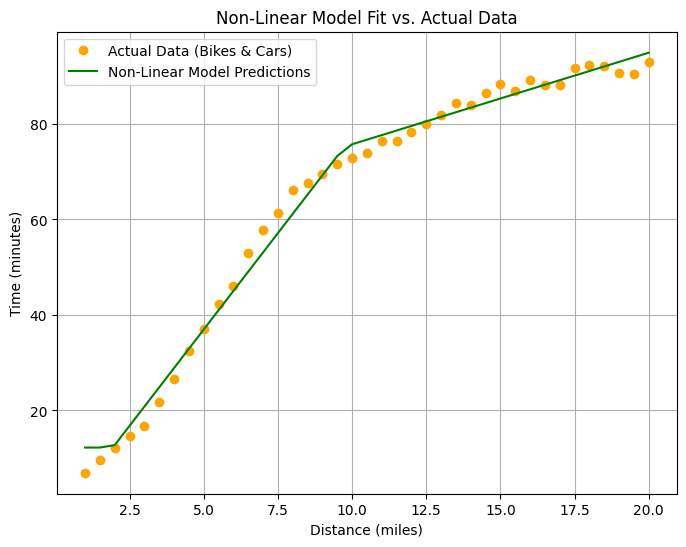

In [11]:
import helper_utils
helper_utils.plot_final_fit(model, distances, times, distances_norm, times_std, times_mean)

In [12]:
import numpy as np
epoch_np = np.array(epoch_value)
loss_np = np.array(loss_value)
print(epoch_np.shape, loss_np.shape)

(3000,) (3000,)


**Plot loss function:**

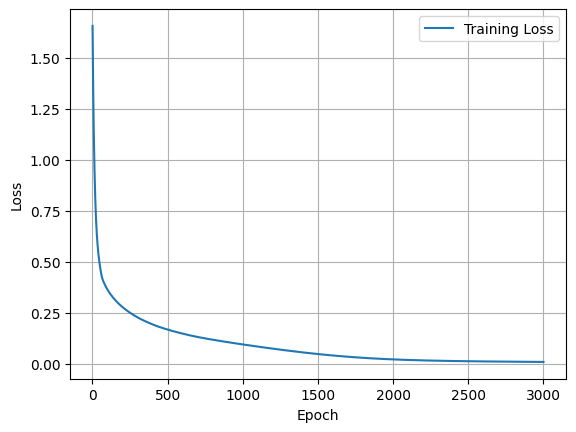

In [13]:
plt.plot(epoch_value, loss_value, label="Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.legend()
plt.show()

In [14]:
distance_to_predict = 5.1

In [15]:
# Use the torch.no_grad() context manager for efficient prediction
with torch.no_grad():
    # Normalize the input distance
    distance_tensor = torch.tensor([[distance_to_predict]], dtype=torch.float32)
    new_distance_norm = (distance_tensor - distances_mean) / distances_std

    # Get the normalized prediction from the model
    predicted_time_norm = model(new_distance_norm)

    # De-normalize the output to get the actual time in minutes
    predicted_time_actual = (predicted_time_norm * times_std) + times_mean

    # --- Decision Making Logic ---
    print(f"Prediction for a {distance_to_predict}-mile delivery: {predicted_time_actual.item():.1f} minutes")

    # First, check if the delivery is possible within the 45-minute timeframe
    if predicted_time_actual.item() > 45:
        print("\nDecision: Do NOT promise the delivery in under 45 minutes.")
    else:
        # If it is possible, then determine the vehicle based on the distance
        if distance_to_predict <= 3:
            print(f"\nDecision: Yes, delivery is possible. Since the distance is {distance_to_predict} miles (<= 3 miles), use a bike.")
        else:
            print(f"\nDecision: Yes, delivery is possible. Since the distance is {distance_to_predict} miles (> 3 miles), use a car.")

Prediction for a 5.1-mile delivery: 37.8 minutes

Decision: Yes, delivery is possible. Since the distance is 5.1 miles (> 3 miles), use a car.
